<a href="https://colab.research.google.com/github/gibeom92/dispersion_PINN/blob/master/1D_dispersion_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d

In [ ]:
L = 10  # Length/2 of domain
N = 200  # Number of discretization points
dx = L*2/N  # 0.1
dt = 0.01
T = 0.1

K = 5   # diffusion coefficient
u = 10   # wind profile

In [ ]:
x = np.arange(-L, L, dx)  # Define x domain
t = np.arange(0,T,dt)

# Initial condition
C_0 = 1 / np.cosh(10 * x)

# Define discrete wavenumbers
kappa = 2 * np.pi * np.fft.fftfreq(N, d=dx)

In [ ]:
def rhsair(C, t, K, u, kappa):
    Chat = np.fft.fft(C)
    d_Chat = (1j) * kappa * Chat
    dd_Chat = -np.power(kappa, 2) * Chat
    d_C = np.fft.ifft(d_Chat)
    dd_C = np.fft.ifft(dd_Chat)

    dC_dt = -u * d_C + K * dd_C

    return dC_dt.real

C = odeint(rhsair, C_0, t, args=(K, u, kappa))

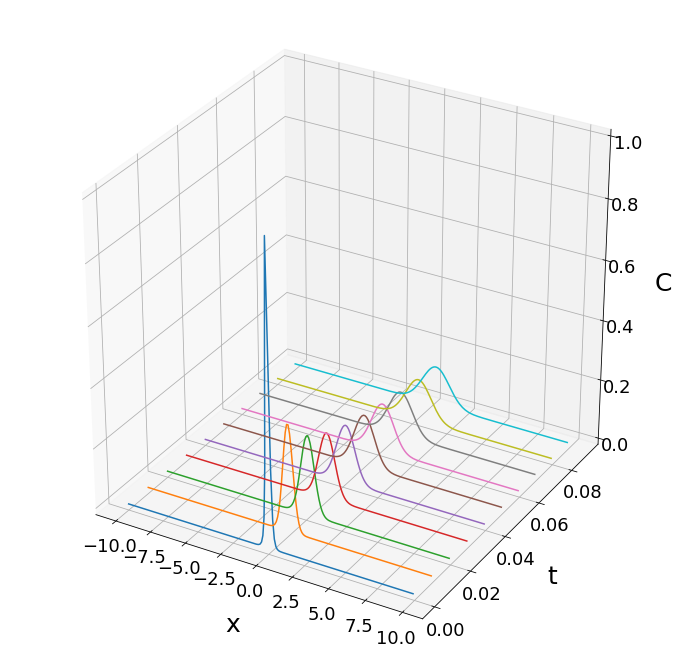

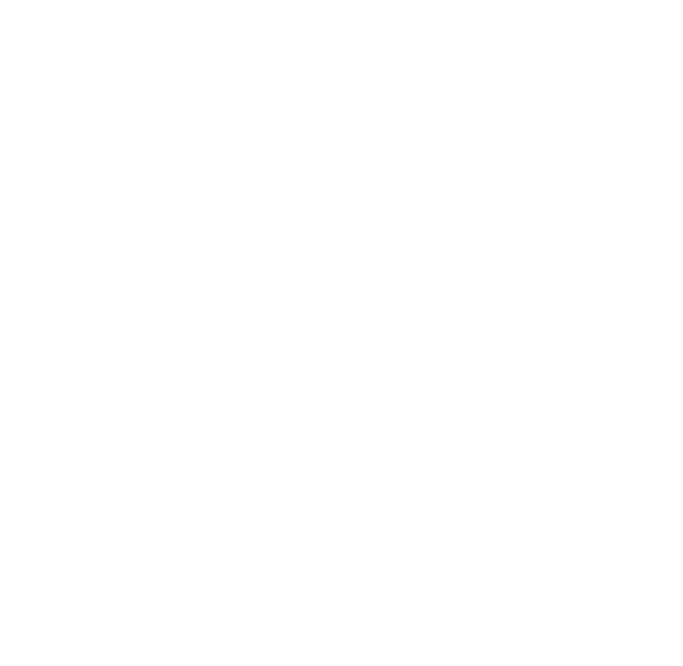

In [ ]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size': 18})
fsize = 25

# Waterfall plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

C_plot = C
for j in range(C_plot.shape[0]):
    ys = j * np.ones(C_plot.shape[1]) * dt
    ax.plot(x, ys, C_plot[j, :])
    ax.set_xlabel('x', size=fsize, labelpad=20)                                
    ax.set_ylabel('t', size=fsize, labelpad=20)                            
    ax.set_zlabel('C', size=fsize, labelpad=20)  

# Image plot
plt.figure()
plt.axis('off')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.DataFrame(C_plot)
df.to_excel(excel_writer='/content/drive/My Drive/Colab Notebooks/Dispersion/FFT.xlsx')